In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
print(f"train_x shape: {train_x.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"test_x shape: {test_x.shape}")
print(f"test_y shape: {test_y.shape}")

train_x shape: (60000, 28, 28)
train_y shape: (60000,)
test_x shape: (10000, 28, 28)
test_y shape: (10000,)


In [10]:
train_x = train_x / 255.0
test_x = test_x / 255.0

In [14]:
train_x.shape

(60000, 28, 28)

In [15]:
train_x_flattened = train_x.reshape(len(train_x), 28*28)    # 28*28 = 784 pixels in each image
test_x_flattened = test_x.reshape(len(test_x), 28*28)   

In [16]:
train_x_flattened.shape

(60000, 784)

In [17]:
imput_size = 784
output_size = 10

hidden_layer_size = 100

model = keras.Sequential([
    keras.layers.Dense(hidden_layer_size, input_shape=(imput_size,), activation='relu'),
    keras.layers.Dense(hidden_layer_size, activation='relu'),
    keras.layers.Dense(hidden_layer_size, activation='relu'),
    keras.layers.Dense(output_size, activation='softmax')
])

c:\Users\mohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
NUM_EPOCHS = 10

# verbose means how much information you want to see during training
model.fit(train_x_flattened, train_y, epochs=NUM_EPOCHS)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8722 - loss: 0.4342
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9680 - loss: 0.1072
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9766 - loss: 0.0746
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0569
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9854 - loss: 0.0455
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9885 - loss: 0.0362
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9900 - loss: 0.0307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9913 - loss: 0.0268
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0219
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0216


In [20]:
model.evaluate(test_x_flattened, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9766 - loss: 0.1026


[0.08624504506587982, 0.9789999723434448]

In [24]:
y_predicted = model.predict(test_x_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([2.49254393e-13, 4.86000076e-08, 3.38299841e-08, 1.08324116e-07,
       3.67665187e-09, 2.39073900e-11, 7.66719996e-17, 9.99999404e-01,
       1.59404739e-10, 4.11131367e-07], dtype=float32)

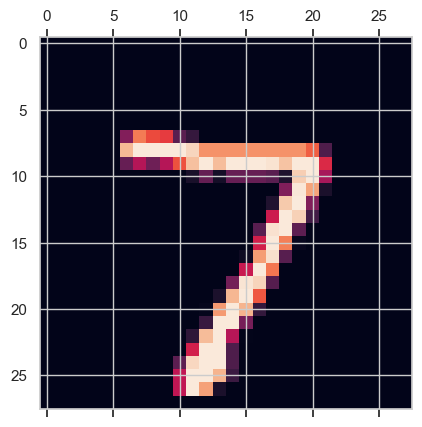

In [23]:
plt.matshow(test_x[0])

Text(92.25, 0.5, 'Truth')

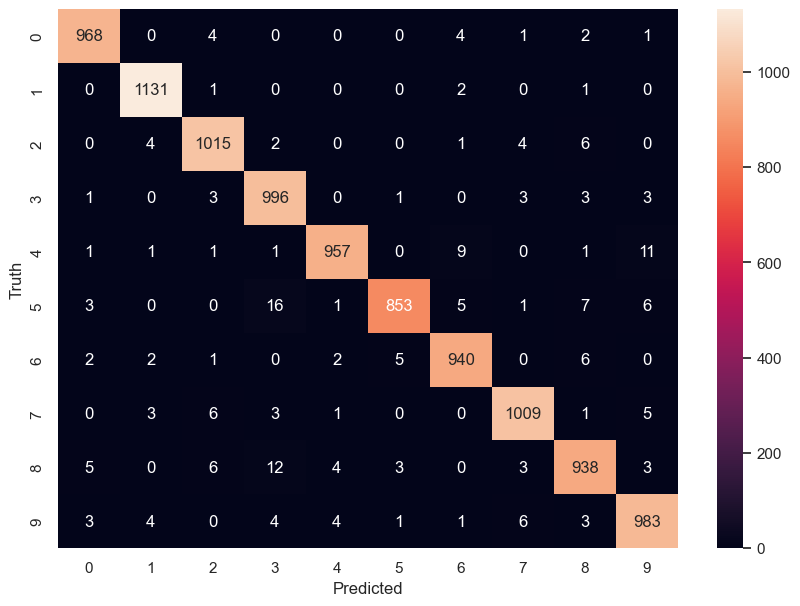

In [26]:
cm = tf.math.confusion_matrix(labels=test_y,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')